# Entrenar una red convolucional

In [85]:
# Importar las librerías de FastAI
from fastai.imports import *

In [86]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

### Área del proceso. Resolución a utilizar

In [87]:
PATH = "model_data/"
sz=224

# ¿Están activas las librerías para trabajar sobre GPU?

In [88]:
torch.cuda.is_available()

True

In [89]:
torch.backends.cudnn.enabled

True

In [90]:
os.listdir(PATH)

['train', 'valid', 'test']

In [91]:
os.listdir(f'{PATH}valid')

['megaman-x-gameplay', 'super-mario-world-gameplay']

In [92]:
files = os.listdir(f'{PATH}valid/megaman-x-gameplay')[:5]
files

['4172464600.jpeg',
 '7671041089.jpeg',
 '1911689630.jpeg',
 '3399910389.png',
 '1697277917.jpeg']

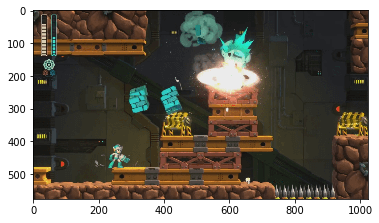

In [93]:
img = plt.imread(f'{PATH}valid/megaman-x-gameplay/{files[3]}')
plt.imshow(img);

In [94]:
img.shape

(576, 1024, 3)

# Contenido de una imagen

In [95]:
img[:4,:4]

array([[[0.15294, 0.15686, 0.1451 ],
        [0.15294, 0.15686, 0.1451 ],
        [0.17255, 0.17255, 0.1451 ],
        [0.18431, 0.18824, 0.15686]],

       [[0.17255, 0.17255, 0.1451 ],
        [0.17255, 0.17255, 0.1451 ],
        [0.18431, 0.18824, 0.15686],
        [0.23922, 0.25098, 0.22745]],

       [[0.15686, 0.19216, 0.2    ],
        [0.15686, 0.19216, 0.2    ],
        [0.23922, 0.25098, 0.22745],
        [0.24706, 0.31765, 0.30588]],

       [[0.28235, 0.28627, 0.27843],
        [0.28235, 0.28627, 0.27843],
        [0.24706, 0.31765, 0.30588],
        [0.24706, 0.31765, 0.30588]]], dtype=float32)

# Entrenando una red neuronal, a partir de un modelo que ya existe.

In [96]:
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 2)

100%|██████████| 2/2 [00:01<00:00,  1.37it/s]


HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy   
    0      0.89519    0.523578   0.801802  
    1      0.671639   0.355717   0.882883  



[array([0.35572]), 0.882882885030798]

In [97]:
# This is the label for a val data
data.val_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [98]:
# from here we know that 'cats' is label 0 and 'dogs' is label 1.
data.classes

['megaman-x-gameplay', 'super-mario-world-gameplay']

In [99]:
# this gives prediction for validation set. Predictions are in log scale
log_preds = learn.predict()
log_preds.shape

(111, 2)

In [100]:
log_preds[:10]

array([[-0.23147, -1.57683],
       [-0.23891, -1.54875],
       [-0.39518, -1.1195 ],
       [-0.39662, -1.11654],
       [-0.34627, -1.22869],
       [-0.28011, -1.40937],
       [-0.55174, -0.8579 ],
       [-0.10907, -2.26985],
       [-0.99104, -0.46392],
       [-0.43057, -1.05021]], dtype=float32)

In [101]:
preds = np.argmax(log_preds, axis=1)  # from log probabilities to 0 or 1
probs = np.exp(log_preds[:,1])        # pr(dog)

In [102]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], 4, replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

In [103]:
def plot_val_with_title(idxs, title):
    imgs = np.stack([data.val_ds[x][0] for x in idxs])
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(data.val_ds.denorm(imgs), rows=1, titles=title_probs)

In [104]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

In [105]:
def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))

Clasificados correctamente


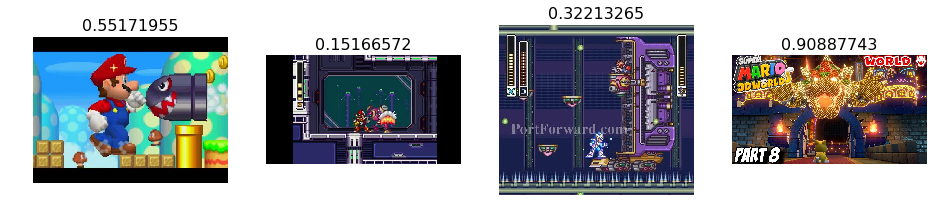

In [106]:
# 1. A few correct labels at random
plot_val_with_title(rand_by_correct(True), "Clasificados correctamente")

Incorrectly classified


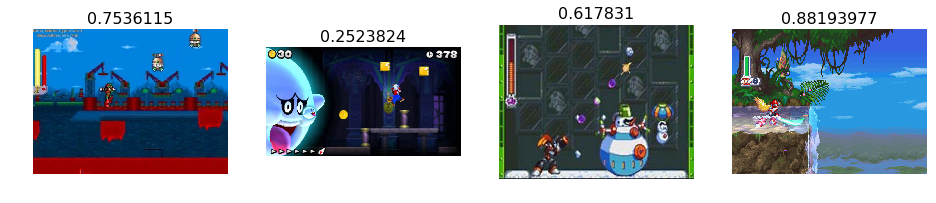

In [107]:
# 2. A few incorrect labels at random
plot_val_with_title(rand_by_correct(False), "Incorrectly classified")

In [108]:
def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]

def most_by_correct(y, is_correct): 
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask(((preds == data.val_y)==is_correct) & (data.val_y == y), mult)

Clase 0 más correcta


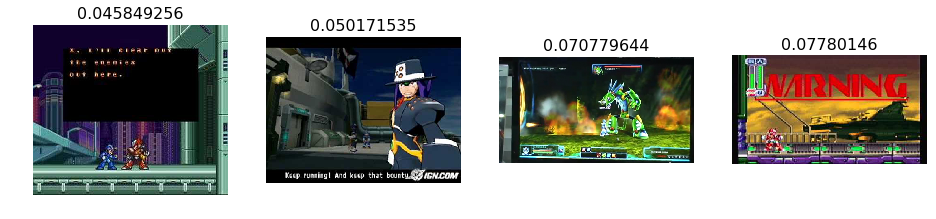

In [109]:
plot_val_with_title(most_by_correct(0, True), "Clase 0 más correcta")

Clase 1 más correcta


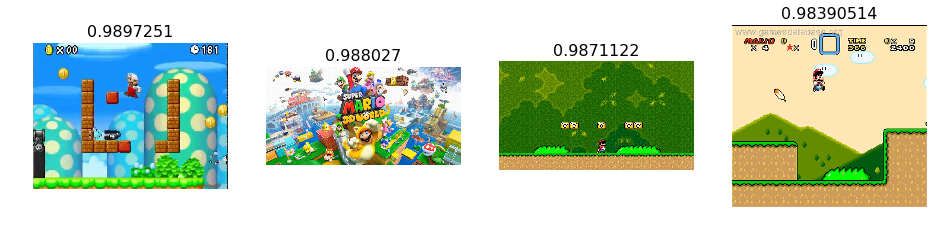

In [110]:
plot_val_with_title(most_by_correct(1, True), "Clase 1 más correcta")

Más clase 1 incorrecta


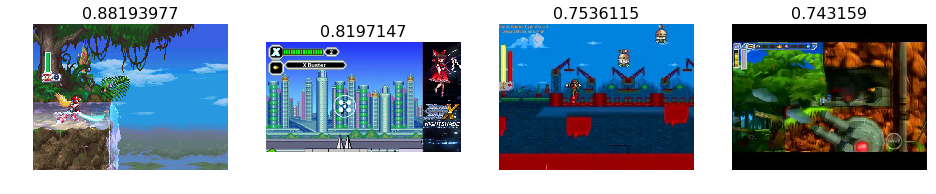

In [111]:
plot_val_with_title(most_by_correct(0, False), "clase 1 incorrecta")

clase 0 incorrecta


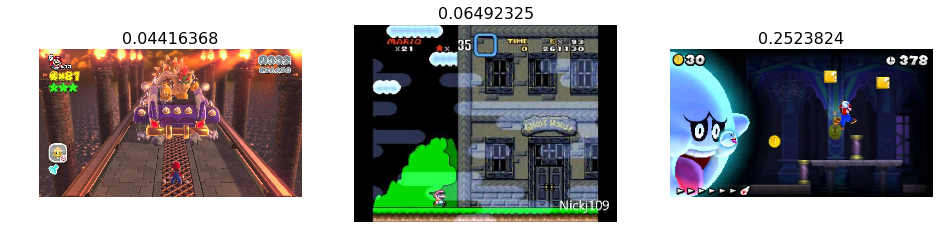

In [112]:
plot_val_with_title(most_by_correct(1, False), "clase 0 incorrecta")

# Más incierta

Most uncertain predictions


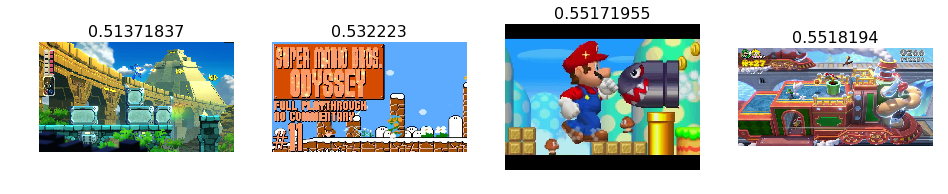

In [113]:
most_uncertain = np.argsort(np.abs(probs -0.5))[:4]
plot_val_with_title(most_uncertain, "Most uncertain predictions")